In [1]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

from Modell import SIRModel
from Agenter import SIRAgent


from mesa import Agent, Model
from mesa.space import MultiGrid
import random

import matplotlib.pyplot as plt


N = 100000
width = 140
height = 70
initial_infected = 100
vaccination_rate = 0.5
mortality_rate = 0.0021
timesteps = 100

model = SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

S_history = []
I_history = []
R_history = []
D_history = []

for t in range(timesteps):
    model.step()
    S_history.append(model.count_status("S"))
    I_history.append(model.count_status("I"))
    R_history.append(model.count_status("R"))
    D_history.append(model.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model.count_status("S"))
print("I:", model.count_status("I"))
print("R:", model.count_status("R"))
print("D:", model.count_status("D"))



S: 10
I: 0
R: 98913
D: 1077


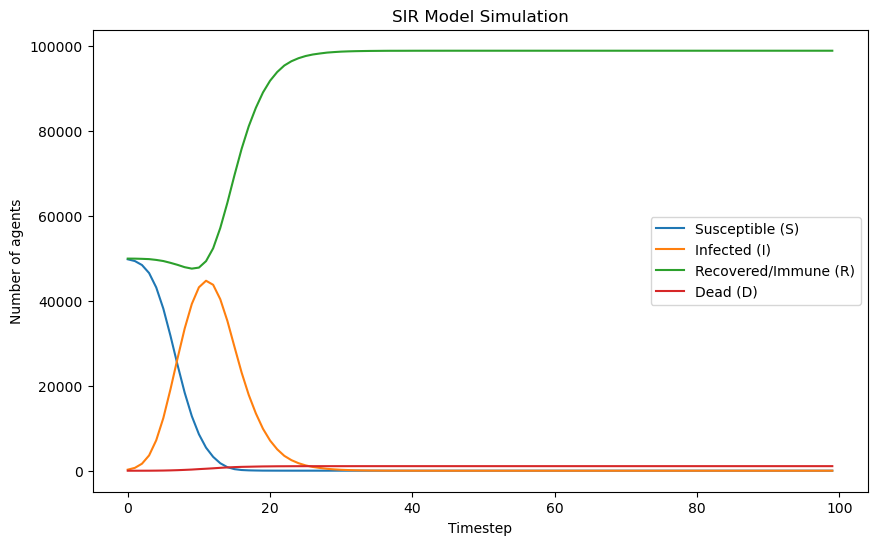

In [2]:

plt.figure(figsize=(10,6))
plt.plot(S_history, label="Susceptible (S)")
plt.plot(I_history, label="Infected (I)")
plt.plot(R_history, label="Recovered/Immune (R)")
plt.plot(D_history, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()


In [3]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
Re = sum(secondary.values()) / len(secondary) if secondary else 0 
print("Re =", Re)

Re = 1.919117858477817


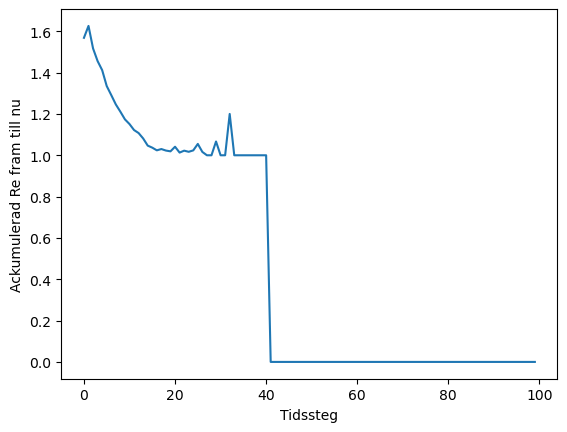

In [4]:
plt.plot(model.Re_history)
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()